## NVLab Summer School Assignment 1
Part II.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !ls /content/drive/
# %cd "/content/drive/My Drive"
# %cd "HW1/resources"

# !ls

MyDrive  Shareddrives
/content/drive/My Drive
/content/drive/My Drive/summer_hw1/hw1/resources
r1.jpg


In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
# from google.colab.patches import cv2_imshow

A. Convolution Implementation

In [30]:
def my_conv(img, kernel):
    '''
    function: convolution

    img: (H*W*C) numpy array
    kernel: (K*K) numpy array
    output: (H*W*C) numpy array
    '''
    pad_size = kernel.shape[0]//2
    (height, width, channel) = img.shape
    # Zero-padding
    pad_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REPLICATE)
    # Convolution
    output_img = np.zeros(img.shape)
    for i in range(height):
        for j in range(width):
            for c in range(channel):
                output_img[i, j, c] = np.sum(pad_img[i:i+kernel.shape[0], j:j+kernel.shape[1], c] * kernel)
                if output_img[i, j, c] > 255:
                    output_img[i, j, c] = 255
                elif output_img[i, j, c] < 0:
                    output_img[i, j, c] = 0
    output_img = np.uint8(output_img)
    
    return output_img

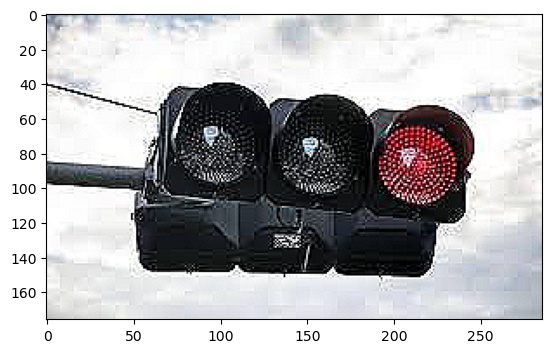

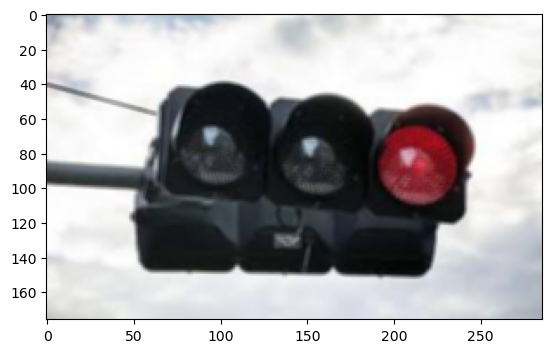

True

In [34]:
## read image from resource/
img = cv2.imread("resource/r1.jpg")

## set kernel
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) 
boxblur_kernel = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

sharpen_img = my_conv(img, sharpen_kernel)
boxblur_img = my_conv(img, boxblur_kernel)

plt.imshow(cv2.cvtColor(sharpen_img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(boxblur_img, cv2.COLOR_BGR2RGB))
plt.show()

# image writing
image_path = "output/part2/sharpen.jpg"
folder_path = os.path.dirname(image_path)
os.makedirs(folder_path, exist_ok=True)
cv2.imwrite(image_path, sharpen_img)

image_path = "output/part2/boxblur.jpg"
cv2.imwrite(image_path, boxblur_img)

B. Hybrid Image

In [ ]:
def my_GaussianBlur(size, sigma):
    '''
    function: gaussian blur kernel generating

    size: kernel size, should be an odd number
    sigma: standard deviation of gaussina distribution
    g: gaussian kernel
    '''
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    g = g/g.sum()
    return g